<a href="https://colab.research.google.com/github/DK-77/CE059_Dhruv_Kathrotiya/blob/main/Lab5/Lab5_Task1_CE059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
# only for apples
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [14]:
m = np.mean(inputs,0)
print("mean :- ",m)
std_dev = np.std(inputs, 0)
print("\n\nstandard deviation :- ",std_dev)
#normalizing the input
x = (inputs-m) / std_dev
x = np.hstack((np.ones((targets.size,1)),x))
print("\n\nx ",x)


mean :-  [84.4 85.6 54.4]


standard deviation :-  [12.059851 30.388155 12.499599]


x  [[ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]]


Linear Regression Model (from scratch)

The weights and biases can also be represented as matrices, initialized with random values. The first row of w and the first element of b are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

In [15]:
# Weights and biases
rg = np.random.default_rng(59)
w = rg.random((1, 4))
print(w)

[[0.58774716 0.82606617 0.11694378 0.37742961]]


In [32]:
# MSE loss function
def mse_loss(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [33]:
# Define the model
def predict(x,w):
    return x @ w.T

# Compute error
preds = predict(x,w)
cost_initial = mse_loss(preds, targets)
print("before regression cost is : ", cost_initial)

before regression cost is :  6899.340030881299


In [34]:
def gradient_descent(X, y, w, learning_rate, epochs):
    history = np.zeros((epochs, 1))
    for i in range(epochs):
        h = predict(X, w)
        diff = h - y
        delta = (learning_rate / targets.size) * (X.T@diff)
        new_w = w - delta.T
        w = new_w
        history[i] = mse_loss(h, y)
        print("loss {} iteration {}".format(history[i],i))
    return (history, w)

In [41]:
import matplotlib.pyplot as plt
epochs = 250
learning_rate = 0.01

initial_cost = mse_loss(predict(x, w),targets)

print("Initial cost is: ", initial_cost, "\n")

(history, optimal_params) = gradient_descent(x, targets, w, learning_rate, epochs)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", history[-1])

Initial cost is:  6899.340030881299 

loss [6899.34003088] iteration 0
loss [6741.91862553] iteration 1
loss [6588.44769269] iteration 2
loss [6438.81623603] iteration 3
loss [6292.91674385] iteration 4
loss [6150.64506953] iteration 5
loss [6011.90031633] iteration 6
loss [5876.5847264] iteration 7
loss [5744.60357378] iteration 8
loss [5615.86506138] iteration 9
loss [5490.28022153] iteration 10
loss [5367.76282029] iteration 11
loss [5248.2292651] iteration 12
loss [5131.59851582] iteration 13
loss [5017.79199895] iteration 14
loss [4906.73352493] iteration 15
loss [4798.34920842] iteration 16
loss [4692.56739143] iteration 17
loss [4589.3185692] iteration 18
loss [4488.53531873] iteration 19
loss [4390.15222986] iteration 20
loss [4294.10583879] iteration 21
loss [4200.33456396] iteration 22
loss [4108.77864426] iteration 23
loss [4019.38007933] iteration 24
loss [3932.08257205] iteration 25
loss [3846.83147304] iteration 26
loss [3763.57372708] iteration 27
loss [3682.25782147] it

Adjust Weights using Gradints

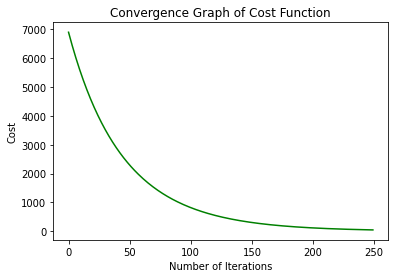

In [42]:
import matplotlib.pyplot as plt


plt.plot(range(len(history)), history, 'g')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [43]:
# Calculate error
preds = predict(x, optimal_params)
cost_final = mse_loss(preds, targets)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n", targets)

Prediction:
 [[ 50.10452811]
 [ 78.70003366]
 [106.81283379]
 [ 15.73616477]
 [ 99.00135493]
 [ 50.10452811]
 [ 78.70003366]
 [106.81283379]
 [ 15.73616477]
 [ 99.00135493]
 [ 50.10452811]
 [ 78.70003366]
 [106.81283379]
 [ 15.73616477]
 [ 99.00135493]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [44]:
print("Cost after linear regression: ", cost_final)
print("Cost reduction : {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression:  48.75964964492111
Cost reduction : 99.29327081392316 %
